In [2]:
import matplotlib.pyplot as plt
import numpy as np
import utils
import glob

def visual_right_scale(pos, ax):
    max_range = np.array([pos[:, 0].max()-pos[:, 0].min(),
                          pos[:, 1].max()-pos[:, 1].min(),
                          pos[:, 2].max()-pos[:, 2].min()]).max() / 2.0

    mid_x = (pos[:, 0].max()+pos[:, 0].min()) * 0.5
    mid_y = (pos[:, 1].max()+pos[:, 1].min()) * 0.5
    mid_z = (pos[:, 2].max()+pos[:, 2].min()) * 0.5

    # make scale look equal
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)


def visualize_3d_boxes(corners3d, ax):
    '''
    corners3d: (N, 8, 3)
    '''
    for n in range(corners3d.shape[0]):
        b = corners3d[n]  # (8, 3)

        for k in range(0, 4):
            i, j = k, (k + 1) % 4
            ax.plot([b[i, 0], b[j, 0]], [b[i, 1], b[j, 1]], [b[i, 2], b[j, 2]],
                    color='r')

            i, j = k + 4, (k + 1) % 4 + 4
            ax.plot([b[i, 0], b[j, 0]], [b[i, 1], b[j, 1]], [b[i, 2], b[j, 2]],
                    color='r')

            i, j = k, k + 4
            ax.plot([b[i, 0], b[j, 0]], [b[i, 1], b[j, 1]], [b[i, 2], b[j, 2]],
                    color='r')
    return

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


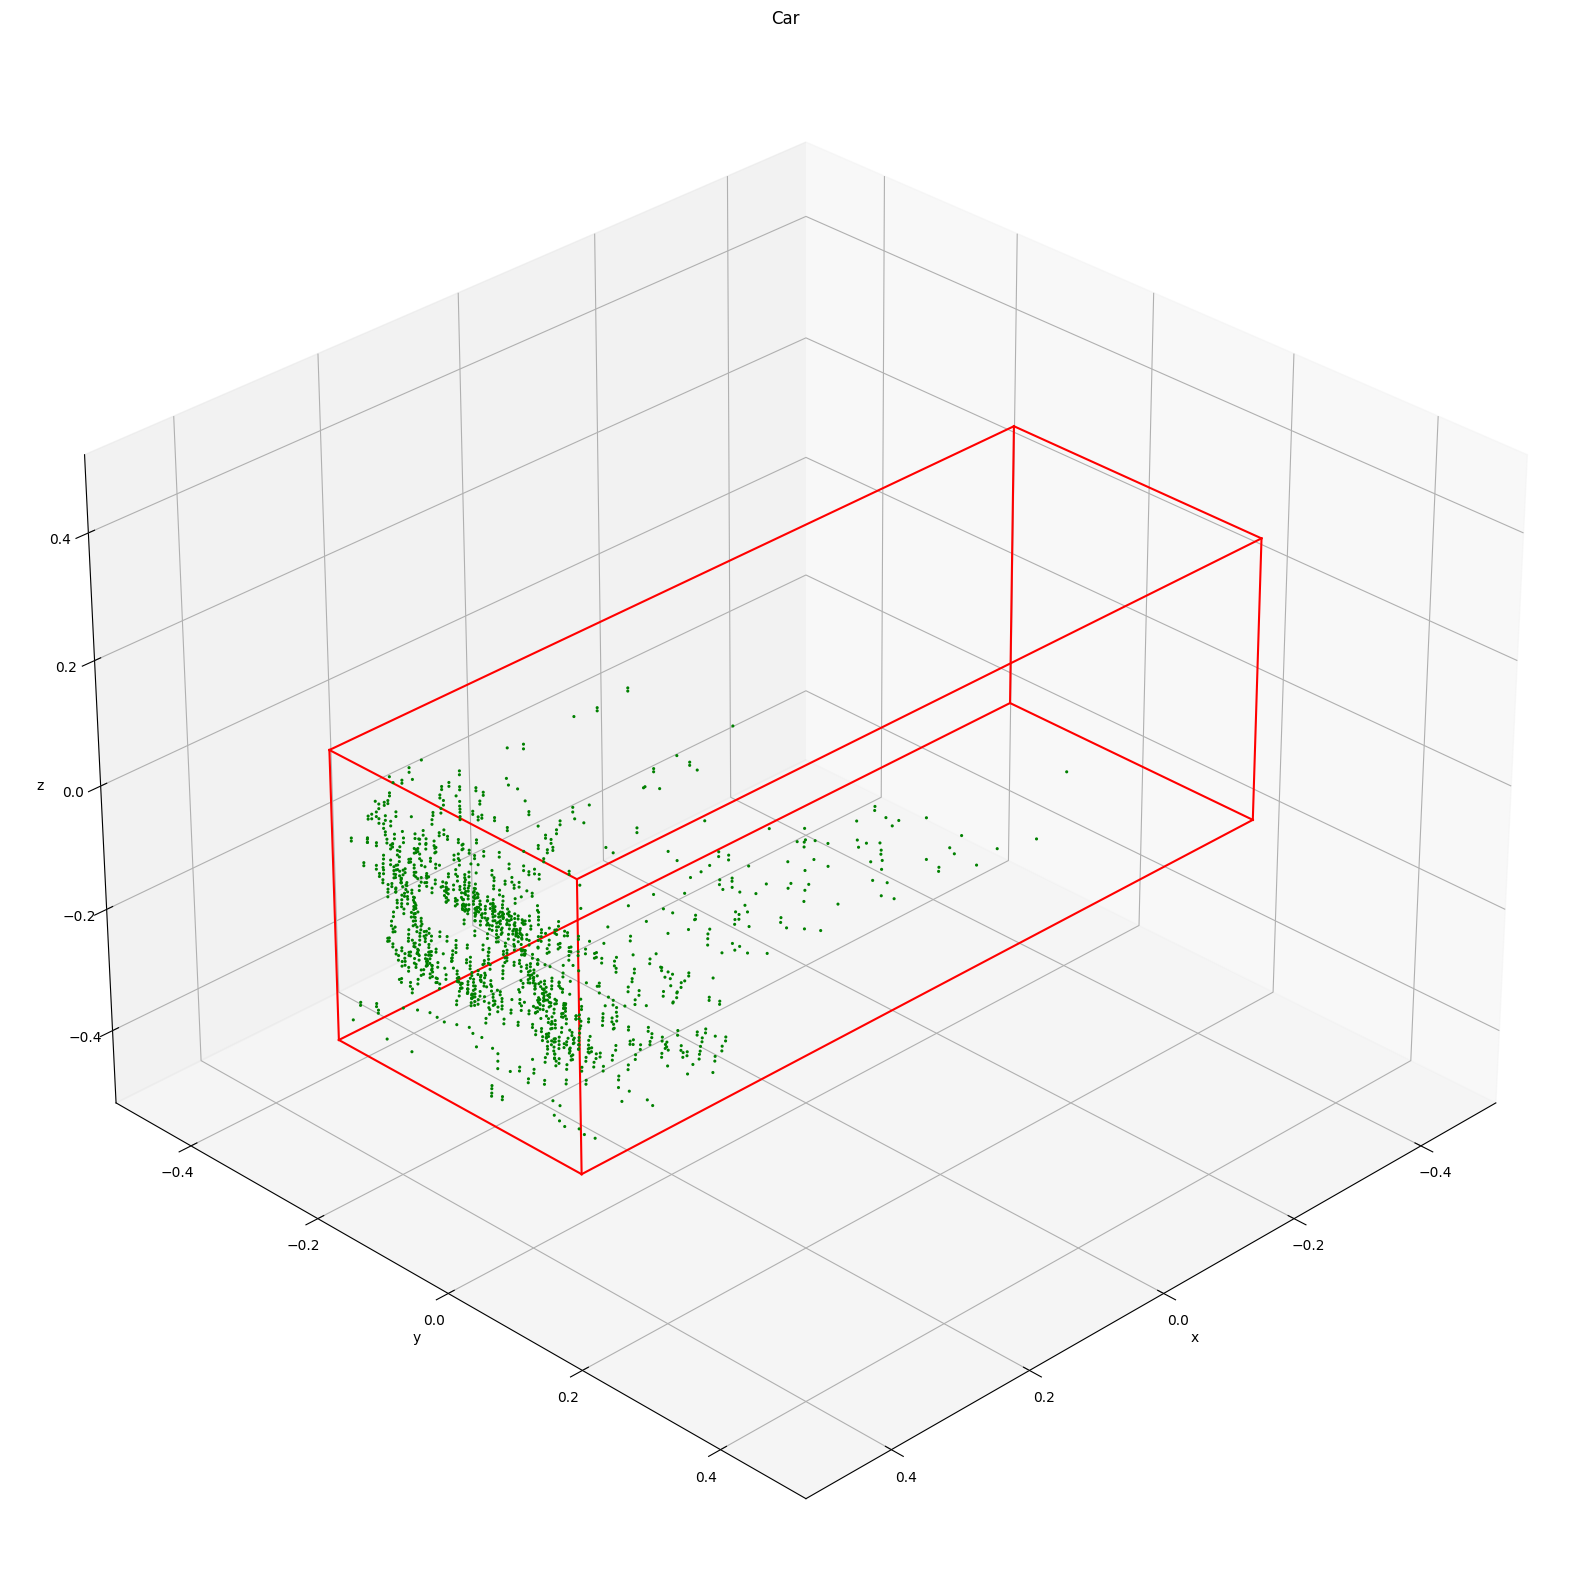

In [44]:
#%matplotlib widget

fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111, projection='3d')

idx = 81
pts = glob.glob("extract/gtruth_pts/1/"+str(idx)+"[.]*[_]*[.]*[.]npy")[0]
bbox = glob.glob("extract/gtruth_boxes/1/"+str(idx)+"[.]*[_]*[.]*[.]npy")[0]

pts = np.load(pts).reshape(-1, 3)
bbox = np.load(bbox).reshape(-1, 7)
corners3d = utils.boxes_to_corners_3d(bbox)

ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], s=5, c='g', lw=0, alpha=1)
visualize_3d_boxes(corners3d, ax)

visual_right_scale(corners3d.reshape(-1, 3), ax)
ax.title.set_text("Car")
ax.view_init(elev=30, azim=45)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [31]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pts = glob.glob("extract/gtruth_pts/1/"+str(1064)+"[.]*[_]*[.]*[.]npy")[0]
bbox = glob.glob("extract/gtruth_boxes/1/"+str(1064)+"[.]*[_]*[.]*[.]npy")[0]

pts = np.load(pts).reshape(-1, 3)
bbox = np.load(bbox).reshape(-1, 7)
corners3d = utils.boxes_to_corners_3d(bbox)

ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], s=5, c='g', lw=0, alpha=1)
visualize_3d_boxes(corners3d, ax)

visual_right_scale(corners3d.reshape(-1, 3), ax)
ax.title.set_text("Car")
ax.view_init(elev=120., azim=-90)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

<IPython.core.display.Javascript object>